<a href="https://colab.research.google.com/github/jdansb/Econophysics/blob/main/files/monetary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I had initially decided to use this space to focus only on quantitative discussions about econophysics models, mainly aiming to share code and the mathematical development of these models. I thought this because I felt I did not have the capacity to engage in a conceptual discussion about economics. However, I believe there are some conceptual discussions within econophysics that should be remembered. This is why I decided to bring a paper on the [Philosophy of Econophysics](https://github.com/jdansb/Econophysics/blob/main/files/Filosofia%20da%20Econof%C3%ADsica.md), and today I want to present the paper [Monetary Economics from an Econophysics Perspective](https://arxiv.org/abs/1608.04832) written by Victor M. Yakovenko, where, as he himself says: "the style of this paper is quite informal, and the primary focus is on conceptual foundation, rather than technical details of mathematical models and empirical data."

Since his model has an indisputable importance in establishing wealth distribution inequality as one of the main objects of study in econophysics, I believe it is interesting to engage with this conceptual discussion about his models. As in the previous case, my text is meant to be no more than a summary of the full work, where I attempt to compile the excerpts I consider most important.

Although this is not the part that interests me most at the moment, I would like to highlight the result of Yakovenko's model:

> …there are few rich agents with high monetary balances and many poor agents with low balances, so the distribution is highly unequal, even though the agents are statistically identical. This is a shocking conclusion for the social sciences, where inequality is generally attributed to intrinsic differences between agents. There is a critique that many economists are not fully familiar with the concept of statistical equilibrium, but only with mechanical equilibrium.

To proceed, we need to start with the definition of money: money is then just a digital accounting, a digital token, that is, it can be expressed as a number. Moreover, by its very functioning, money must necessarily be conserved, so this is not a peculiar artifact but a fundamental accounting principle on which the functionality of money is based. That is, the agents involved cannot produce or destroy money.

This becomes explicit when we list the three properties of money: medium of exchange, measure of value, and store of value, which only make sense if money is conserved. These properties would be lost if agents were able to produce money themselves.

How money can arise in a system where agents cannot produce it? Suppose we have a system where all agents start with 0 money, but when one agent provides a service to another, the balances of both agents change conservatively, that is, we can simply record that one agent now has a negative balance for having ‘paid’ and another agent has a positive balance for having ‘received’; it is just a matter of accounting. However, what happens in this system if there is no lower limit on negative balances? Could I indefinitely enjoy the services of others? In this sense, it is necessary to impose a minimum limit, such that as soon as an agent reaches this balance, they cannot receive services without providing them.

At this point, we can simplify money by shifting all balances so that the negative limit is now zero. This is equivalent to initially giving each agent an initial amount of money equal in magnitude to the previous minimum limit. Thus, the minimum balance is now zero, and the initial balance (or now, the initial money) is an amount greater than zero. Since money is now positive, we could even use physical objects as symbols of money. Yakovenko cites Modern Monetary Theory (MMT) as a reference for discussing how money is created at the national scale.

What I find most interesting are two things. First, as already mentioned, the initial condition of monetary balances among agents, even if they are statistically identical, does not lead to an equal distribution of money. Second, quoting Yakovenko:

> The laissez-faire economic school argues that if all constraints and regulations are removed, the economy will reach a natural equilibrium and should remain so. However, this argument is misleading, since equilibrium cannot be reached without the imposition of boundary conditions, that is, regulations.

To illustrate the discussion, we can work with a simple code example. First, let's build a model where we have N agents with 10 coins each. At each step, we randomly select 2 agents and transfer one coin from one agent to the other. The result at three different time steps can be seen below.

What we can observe is that this system without restrictions does not reach equilibrium. As time progresses, the curve in the histogram becomes flatter and flatter, never reaching a true equilibrium, since it is always possible for an agent to increase their debt to an infinite amount.


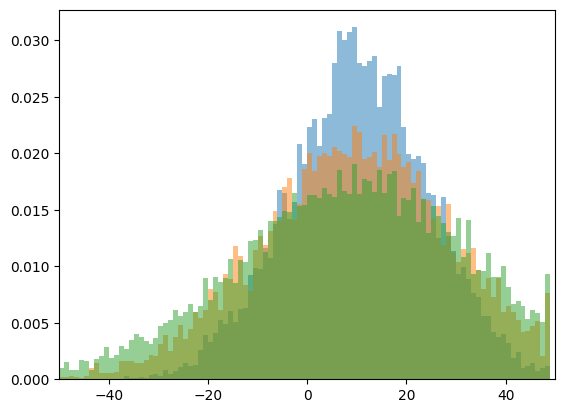

In [ ]:
# @title
import random
import matplotlib.pyplot as plt
import numpy as np

def simulacao(ini,s):
  N=10000      #Number of agentes
  M=N*[ini]   #Money of agentes
  steps=N*s
  for i in range(steps):
    a = random.randint(0,N-1)
    b = random.randint(0,N-1)
    M[a] = M[a] - 1
    M[b] = M[b] + 1
  return M

M=[]
for x in range(3):
  M.append(simulacao(10,(x+1)*100))

bins = np.arange(-50, 50, 1)
for x in range(3):
  plt.hist(M[x],density=True,bins=bins,alpha=0.5)
plt.xlim([-50,50])
plt.show()



Below we perform a similar simulation, but now we set a lower limit of 0. That is, an agent cannot incur debt. If a given agent's wealth is 0, they can only gain coins, not give them away. Two results can be observed here:

1. The system reaches equilibrium: we can see that the histogram at 3 different time steps is qualitatively the same.
2. Even though the initial conditions and the rules of exchange are identical, the final wealth distribution is highly unequal.


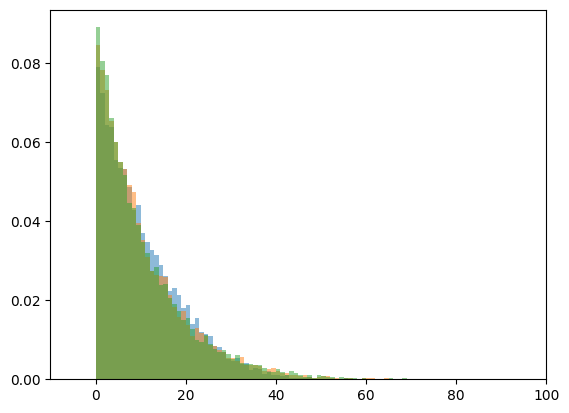

In [ ]:
# @title
import random
import matplotlib.pyplot as plt
import numpy as np

def simulacao(ini,s,min):
  N=10000      #Number of agentes
  M=N*[ini]   #Money of agentes
  steps=N*s
  for i in range(steps):
    a = random.randint(0,N-1)
    b = random.randint(0,N-1)
    if(M[a]>min):
      M[a] = M[a] - 1
      M[b] = M[b] + 1
  return M

M=[]
for x in range(3):
  M.append(simulacao(10,(x+1)*100,0))

bins = np.arange(-10, 100, 1)
for x in range(3):
  plt.hist(M[x],density=True,bins=bins,alpha=0.5)
plt.xlim([-10,100])
plt.show()



Reversing our discussion, we can see that if we move the minimum limit from 0 to -10, and equivalently the initial wealth is also 10 units lower than in the previous case, that is, each agent starts with 0 coins, we can notice that the result is analogous to the previous case, just shifted 10 units to the left.


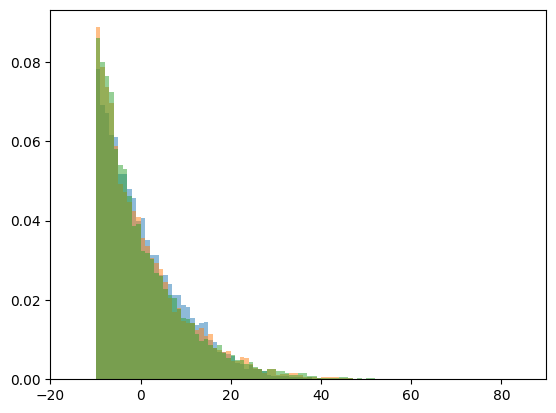

In [ ]:
# @title
M=[]
for x in range(3):
  M.append(simulacao(0,(x+1)*100,-10))

bins = np.arange(-20, 90, 1)
for x in range(3):
  plt.hist(M[x],density=True,bins=bins,alpha=0.5)
plt.xlim([-20,90])
plt.show()


**Fallacy 1**: Money grows as a result of investment.

It is claimed that by buying \$100 worth of gold and selling it years later for \$200, the amount of money has increased.

To advance the discussion, we need to distinguish between what the author calls two layers: there is a physical layer in society, where all things with physical existence are located, and a monetary layer, that is, related to money—an informational layer. The two layers are coupled and related but are not exactly the same thing. In this example, we have a gold transaction in the physical layer and a monetary transaction in the informational layer.

In this case, it is necessary to consider all agents involved. From an individual perspective, it seems that money has increased, but that is because we are looking at a single individual. Nothing in this example necessarily implies that money ceases to be conserved when we look at the system as a whole. Even if I give \$100 to one agent in exchange for gold, and then give that gold to another agent in exchange for $200—even if those agents never interact with each other—in the most extreme case, this only implies that there must have been $300 in existence in the system from the beginning. Another example involving pension fund investment is discussed in the paper, as well as the following recommended reading: H. S. Dent, The Great Boom Ahead (Hyperion, New York, 1993).

**Falácia 2**: O dinheiro cresce como resultado da produção. Se o dinheiro é uma forma de medir a riqueza,  e se a riqueza coletiva aumenta no tempo como resultado da produção, então o dinheiro deveria aumentar também.

Porém o aumento na produção, a expansão da camada física não se traduz imediatamente na expansão da camada monetária, elas são diferentes e seguem regras diferentes. Esse tipo de argumento é normalmente trazido pela escola monetária de economia.


**Falácia 3[^1]**: A terceira falácia é sobre modelos econômicos sem dinheiro. O argumento é que a maior parte das crises econômicas recentes são na camada monetária, e não na física. Então se tentarmos eliminar o dinheiro do modelo, assumindo um funcionamento ideal, não podemos explicar as crises econômicas. Mas por outro lado, podemos reduzir o modelo à transferência de dinheiro entre os agentes (abstraindo questões de produção) e obter resultados interessantes, isso é por exemplo a abordagem adotada no modelo do The Social Architecture of Capitalism (Ian Wright).

Dinheiro e bens físicos pertencem a diferentes camadas da economia, mas normalmente são combinados em uma única variável chamada de riqueza definida como $w_i=m_i+\sum_{j}p_jv_{ji}$, onde temos que a riqueza do agente $i$ é dada em parte pela riqueza monetária $m_i$ e em parte pelos produtos em sua posse, onde o preço $p_j$ é um coeficiente de conversão que converte de unidades físicas, o volume do produto $j$ em posse do agente $i$ ($v_{ji}$), para unidades monetárias.

Como combina conceitos de duas camadas diferentes, a riqueza se comporta de forma diferente do dinheiro. Por exemplo, a riqueza pode crescer com a produtividade.




**Falácia 4**:  Feita a distinção de dinheiro e riqueza, uma crítica válida a econofísicas pode ser dirigida a modelos que buscam interpretar a transferência e conservação não de dinheiro, mas de riqueza. Ainda que matematicamente equivalente, há uma diferença conceitual.



Chegamos agora a provavelmente um dos temas mais relevantes que é a criação do dinheiro pelo estado. Quando se pensa sobre o dinheiro ser conservativo (ou não) este é um dos principais pontos a serem levantados, afinal, o estado tem a capacidade (que de fato põe em prática) de produzir dinheiro. Então é natural nos perguntar como conciliar esta capacidade estatal com um modelo conservativo de dinheiro. Neste sentido, Yakovenko define então o sistema econômico como o conjunto de agentes privados onde o estado está fora do sistema. Neste caso o sistema é conservativo, ainda que a grandeza total não se mantenha conservada devido ao fluxo de entrada e saída da interação do sistema com componentes externos a ele. Ou seja, quando se constrói um modelo de um sistema econômico, o estado é considerado externo ao sistema e nesta condição, o dinheiro se conserva.

E quais são as motivações ou necessidade do estado injetar dinheiro no sistema? Uma razão dentre muitas é o crescimento da população. Se a população cresce mas a quantidade de dinheiro  não, então o dinheiro per capita vai decrescer, de forma que o poder de compra de uma mesma quantidade de dinheiro aumenta. Essa consequente diminuição nos preços é chamada de deflação, e assim que um agente perceber este fenômeno, ele pode se sentir estimulado  a guardar o dinheiro pois poderá comprar mais produtos no futuro, retirando mais dinheiro de circulação e acentuando a deflação. Então pode-se argumentar que o estado deveria aumentar a quantidade de dinheiro, pelo menos, em proporção com N. Até mesmo a escola monetária propôs uma regra monetária de injeção constante de dinheiro de acordo com um cronograma regular, argumentando que uma moderada inflação estimula a economia.

Se seguirmos o conceito no qual o dinheiro deve ser adquirido pelo trabalho, a melhor forma do estado injetar novo dinheiro é financiando projetos de infraestrutura pública que irão beneficiar toda sociedade.  Parte do financiamento desses projetos também podem ser pagos por impostos coletados pelo estado, a proporção entre ambos é uma questão técnica e prática, e não um dogma do tipo “balanço governamental equilibrado.” Um exemplo prático destes gastos são os gastos militares. Somente o governo pode pagar pelo enorme preço dos mísseis balísticos que ninguém quer usar, o complexo industrial-militar tem sido o principal motor da economia americana por muitos anos, milhares de dólares de novo dinheiro tem sido criado para pagar por guerras.

Dentro do estado, o governo é apenas um braço executivo e usualmente separado do banco central que tem autoridade monetária, isso significa que usualmente o governo não imprime dinheiro por si próprio. Assim o governo consegue recursos coletando impostos, taxas ou pegando emprestado emitindo títulos públicos por exemplo. Neste último caso, agentes privados emprestam dinheiro  para o governo de forma que não alteram o dinheiro total no sistema. Nos Estados Unidos, o governo opera quase sempre em déficit, emitindo novos títulos para refinanciar os antigos. Um dinheiro novo é injetado no sistema quando a Reserva Federal cria reservas bancárias e compra esses títulos no mercado, expandindo assim a base monetária. Porém, a Reserva Federal não tem permissão para comprar títulos diretamente do governo, apenas de bancos comerciais, gerando então o mesmo fluxo, porém pagando taxas para os bancos pela intermediação.

Além disso, os títulos públicos determinam que, ao final do prazo, o governo devolva ao Banco Central o valor principal acrescido de juros. No entanto, como o Banco Central repassa seus lucros ao Tesouro, o resultado líquido é equivalente a um empréstimo sem juros do Banco Central ao governo. Esse processo também permite ao Banco Central tanto injetar quanto remover dinheiro da economia, dependendo da necessidade.

No entanto, como essa compra não pode ser feita diretamente do governo, entram em cena os bancos comerciais (geralmente privados), que atuam como intermediários no processo. Essa intermediação lhes garante ganhos relevantes, seja por meio da revenda dos títulos ao banco central ou por lucros com operações relacionadas, o que reforça sua posição no sistema financeiro.

Próximo assunto que podemos discutir é a realação da dívida com a criação de dinheiro. Primeiro vamos considerar o empréstimo sem bancos.

**Falácia 5**: Dinheiro cresce como resultado do empŕesimo entre pessoas físicas. Este é um caso 'simples' similar ao caso de investimento. O dinheiro se mantém conservado se consideramos um sistema como um todo. Se o agente 1 empresta dinheiro para o agente 2, essa quantia de dinheiro é emprestada é subtraída de um agente e adicionado no outro. Durante o empréstimo, o agente 1  fornece dinheiro para o agente 2, que em troca devolve uma nota promissória. Mas esta nota não é dinheiro, ela é um acordo pessoal entre os agentes, ela não circula, então não corresponde a um aumento no dinheiro, independente da taxa de interesse que ela prometa.

**Falácia 6**: O dinheiro cresce como resultado do interesse. Seguindo exemplo anterior, se o dinheiro foi empretado com uma taxa de interesse então o agente 1 fornece por exemplo \$100 para o agente 2, e recebe de volta \$110.  Mas novamente, este dinheiro adicional simplesmente deve ter origem em outros agentes do sistema. A quantidade de dinheiro, evidentemente, se conserva a nível de sistema. Nada disso implica necessariamente em produção de dinheiro, o que nos leva a próxima falácia.

**Falácia 7**: Dinheiro é dívida.

De forma superficial, o ato de pegar um empréstimo pode soar semelhante ao caso que descrevemos de produção de dinheiro no começo, onde ao agente 1 prestar serviço pro agente 2, recebia uma unidade de dinheiro descontada da riqueza do agente 2, podendo inclusive, ficar com uma quantidade de dinheiro negativa. Mas há diferenças significativas entre dinheiro e dívida.
- Dívida cria uma 'cadeia' conectando os dois agentes até que a dívida seja paga. Uma transação de dinheiro é o ponto final e os agentes não tem mais obrigação entre si.
- Dívida é pessoal, mas dinheiro é anônimo. A identificação dos agentes precisa constar em uma promissória, mas não em uma moeda.
- Dívida impõe umad ata a ser paga, enquanto dinheiro não tem marca temporal.
- Há penalidades por não pagar dívida, mas não há analogo para o dinheiro.
- Dívida usualmente envolve interesse, dinheiro não.

Em poucas palavras, o dinheiro é uma promessa para pagar dinheiro, não o dinheiro por si mesmo. De certa forma, podemos pensar que o empréstimo e as promissórias pode ser pensado como uma terceira camada, acima da segunda camada monetária onde o dinheiro realmente circula.





**Falácia 8**: A dívida estabiliza a si mesmo. Vamos discutir primeir a dívida como criação de partícula e anti-partícula. Vamos definir agora um patrimômio líquido do agente $i$ como $\omega_i=m_i+d_i$ onde $m_i$ é o dinheiro em posse do agente $i$ e $d_i=\sum d_{ij}$ são as obrigações monetárias, onde $d_ij$ é o dinheiro que $j$ deve a $i$, logo $d_i< 0$ indica que o agente $i$ deve dinheiro e $d_i>0$ indica que ele tem dinheir a receber.

Evidentemente, se o agente 1 empresta \$10 moedas ao agente 2, então ele perde 10 moedas ($m_i$ diminui 10 unidades ) de forma que diminui seu dinheiro total reduz, porém ele ganha 10 moedas em obrigações monetárias ($d_i$ aumenta 10), de forma que seu patromônio líquido permanece inalterado.

Se permitimos empréstimos entre agentes e não impomos limites, a dívida não é capaz de se estabilizar sozinha. Vamos refazer nossa simulação anterior com um limite inferior de moedas de 0, mas agora se o agente não tem dinheiro, ele pode pegar dinheiro de outros agentes e emitir uma promissória. Evidentemente agora ao invés de analisarmos a quantidade de dinheiro na posse de cada agente, vamos analisar o patrimônio líquido.

Abaixo um código em Python que pode facilmente ser ajustado para ter interesse (mudando a razão entre o dinheiro emprestado e a dívida contraída) e para não ter limites (colocando um limite tão baixo que virtualmente é como se não existisse ou mesmo substituindo o elif por apenas else).

Para simplificar o código não simula diretamente a dívida entre os agentes, mas podemos imaginar que é como se existisse uma agência intermediária. Sempre que o agente 1 empreta 10 moedas ao agente 2 (sem interesse), então o a gente 1 passa a ter 10 moedas a receber de dívida e o agente 2 passa a dever 10 moedas, mas não mantemos o registro de quem deve para quem. Quando o a gente 2 pagar parte da dívida, esta 'agência central' coletará as moedas e escolherá alguém que tem dinheiro de dívida a receber para ter parte da sua dívida paga. De certa forma, estamos apagando uma das típicas condições  de uma dívida (ou adicionando um intermediário), mas observe que isto ainda não é dinheiro, por exemplo, os agentes não podem trocar a dívida entre si. Se o agente 1 ficou com 0 moedas após o empréstimo, ele não pode contratar o agente 3 e pagar apenas com a promessa de dinheiro a ser recebido devido ao empréstimo que fez ao agente 2.

In [ ]:
# @title
import random
import matplotlib.pyplot as plt
import numpy as np

def simulacao(ini,s):
  N=10000      #Number of agentes
  M=N*[ini]   #Money of agentes
  Dt=N*[0]     #Dívida total
  E=[x for x in range(N)] #Agentes que tem dinheiro pra emprestar
  R=[]                    #Agentes qeu tem dívida a receber
                                       #
  steps=N*s
  for i in range(steps):
    a = random.randint(0,N-1) #Quem vai perder dinheiro
    b = random.randint(0,N-1) #Quem vai ganhar dinheiro
    if(M[a]>0):
      M[a] = M[a]-1
      if(M[a]==0):
        E.remove(a)

      M[b] = M[b] + 1
      if(M[b]==1):
        E.append(b)
    elif(Dt[a]>=0):
      k = random.randint(0,len(E)-1)
      c = E[k]
      if(M[c]>0):
        #Sobre o agente C

        M[c]=M[c]-1
        if(M[c]==0):
          E.remove(c)

        Dt[c]=Dt[c]+1
        if(Dt[c]==1):
          R.append(c)

        #Sobre o agente A
        Dt[a]=Dt[a]-1
        if(Dt[a]==0):
          R.remove(a)

        #Sobre o agente B
        M[b]=M[b]+1
        if(M[b]==1):
          E.append(b)

    if(M[b]>0 and Dt[b]<0 and len(R)>0 ):
      k = random.randint(0,len(R)-1)
      c = R[k]
      if(Dt[c]>0):

        M[c]=M[c]+1
        if(M[c]==1):
          E.append(c)

        M[b]=M[b]-1
        if(M[b]==0):
          E.remove(b)


        Dt[c]=Dt[c]-1
        if(Dt[c]==0):
          R.remove(c)

        Dt[b]=Dt[b]+1
        if(Dt[b]==1):
          R.append(b)

  M=np.array(M);Dt=np.array(Dt)
  return M,Dt

E um código para gerar um histograma:

In [ ]:
# @title
M=[];Dt=[]
for x in [300,600]:
  A,B=simulacao(10,x)
  M.append(A)
  Dt.append(B)

bins = np.arange(-80, 80, 1)
for x in range(2):
  plt.hist(M[x]+Dt[x],density=True,alpha=0.5,bins=bins)
plt.show()


Temos um resultado análogo quando só tínhamos dinheiro e nenhuma restrição. Na prática, a condição de fronteira é removida, e e a dívida não é capaz de se estabilizar sozinha, ao menos que imposermos uma restrição novamente. Abaixo o resultado da simulação. Em todas figuras utilizamos N=10.000 agentes e consideramos um passo é exatamente N interaçoes para permitir que todos agentes tenham oportunidade de serem selecionados uma vez por passo em cada papel. O limite mínimo do dinheiro sempre permaneceu fixo em 0, cada agente começou com 10 moedas, e cada transação sempre envolveu a transferêncai de uma unidade de moeda. Neste primeiro momento, para cada uma moeda transferida por empréstimo, é criada uma dívida de também uma unidade (sem taxa de interesse). Foram executadas duas simulações, uma parando no passo 300 e outra nos 600.


O que se observa é que a distribuição se torna mais larga e mais baixa conforme o tempo passa, uma difusão irreversível. Como já vista antes, o sistema não tende a nenhum equilíbrio.

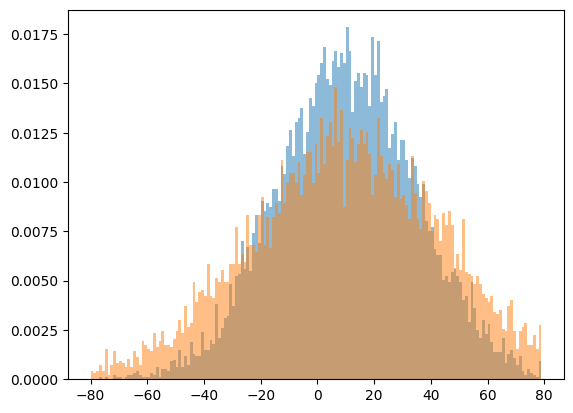

In [ ]:
# @title


Abaixo impusemos uma retrição onde cada agente só pode pedir um empréstimo se não não tiver nenhuma dívida não paga. Uma possibilidade para remover o intermediário, se for manter a retriçao de uma única dívida, é criar outra lista que registre a quem cada agente deve, assim ele sempre pagaria diretamente a quem pediu empréstimo. Mas acredito que o resultado é suficiente para mostrar o nosso ponto, isto é, o sistema atinge um equilíbrio com um limite a esquerda em -1.

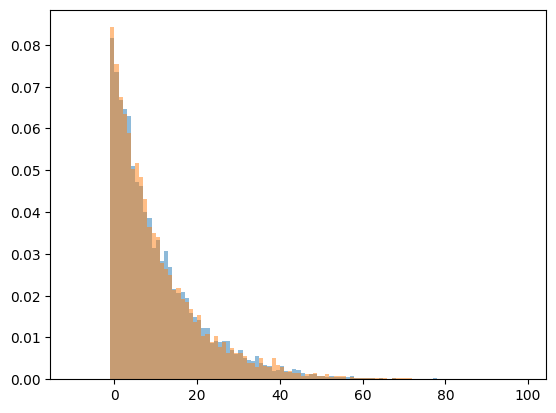

In [ ]:
# @title


**Falácia 9** As taxas de interesse estabilizam o débitdo. Esta é uma falácia análoga, as taxas de interesse na verdade desestabilizam ainda mais o sistema, como foi mencionado anteriormente, apenas a restrição da dívida estabiliza o sistema.

Abaixo as duas situações muito parecidas com o caso anterior, mas agora adicionamos uma taxa de interesse de 100%. Isto é, quando o agente pega um empréstimo de uma moeda, ele cria uma dívida de 2 moedas. Conforme discutido, podemos ver que o sistema é ainda mais desestabilizado, de forma que temos nítidamente a separação da sociedade em dois grupos, aqueles com riqueza positiva e aqueles com riqueza negativa. Como no caso sem interesse, não há um ponto de equilíbrio para o sistema.

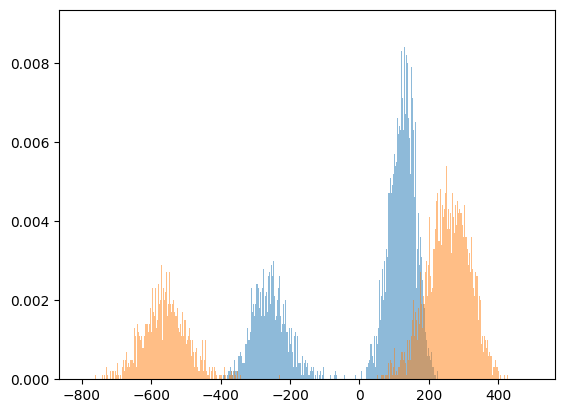

In [ ]:
# @title


Adicionando novamente uma restrição de que o agente não pode ter dívida para solicitar um novo empréstimo, criamos um limite a esquerda e novamente permitimos que o sistema entre em equilíbrio.

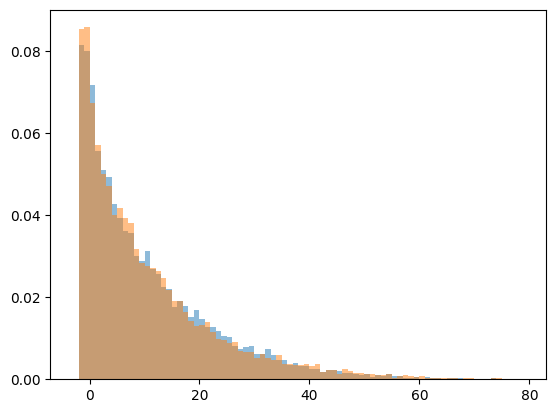

In [ ]:
# @title



**Falácia 10**: Modelos econômicos no qual as dívidas são sempre pagas como prometidas. Por um lado,se este é o caso, podemos simplesmente omitir, como é assumido implicitamente em muitos modelos.  Porém conforme discutido anteriormente, alguns agentes não vão serão capazes de pagar a dívida pois este processe aparenta ser um processo irreversível. Então uma opção é que o agente declare falência, destruindo a promissória entre ambas as partes.

Mas outra opção é que oa gente faça uma nova dívida para pagar a antiga. Esta opção irá adiar o prazo de pagamento da dívida mas a dívida total no sistema deve crescer até atingir um valor crítico no qual dará início a um eeito massivo de uma cascata de falências.

O crescimento do credito e o colapso são processos que acontecem de forma altamente correlacionada e sincronizada. Uma compreensão conceitual e descrição matemática da troca de regimes entre expansão e contração  da dívida é ainda um problema em aberto para a econofisica.



**Falácia 11**:Bancos criam dinheiro, na verdade eles criam dívida. Em um nível mais abstrato, o empréstimo pode ser agregado e anonimzado pelos bancos. Os agentes que querem fornecer empréstimo depositam dinheiro no banco, e o banco empreta dinheiro aos agentes.

Além disso, diferente dos empréstimos entre indivíduos, o depositante ainda pode usar seu dinheiro. O banco cria contas correntes para
os depositantes, para que eles possam emitir cheques em vez de usar o dinheiro em espécie, enquanto o dinheiro depositado é colocado pelo banco comercial em reserva no banco central. Assim o banco etm duas faces, uma para os consumidores (com depósitos e empréstimos_ e outra para o banco central, com transações entre bancos quando os cheques são descontados.

Quando o agente 1 com conta no banco A escreve um cheque de transferẽncia para o agente 2 no Banco B, então uma quantidade correspondente de reservas é transferida do banco A para o banco B no banco central. Assim a transação entre banco é ainda outra camada da economia monetária acima das transações entre agentes. E a conservação de dinheiro se aplica na reserva dos bancos, que são apenas transferidas.

Os bancos suportam um volume de transferência muito vaior que o volume de suas reservas. Se o a gente 1 faz uma transferência para o agente 2 e ambos possuem conta no mesmo banco, então não há transferência de reservas entre os bancos, apenas uma alteraçã nos dígitos das contas dos agentes. E além disso, muitos clinetes do banco A e do banco B fazem transações em ambas direções, deforma que elas se cancelam e a transfenrência líquida diária das reservas pode ser muito menor que o volume total de transação. E por fim, bancos ainda podem pegar emprétimo temporários com outros bancos e com o banco central, de forma que a discussão dos emprestéimos indivudiais se repetem mas ao nível dos bancos ao invés dos agentes.

Porém quando o a gente 1 depois dinheiro no banco, ele pensa que ainda tem esse idniheiro. E quando o agente 2 pega o empréstimo com o banco ele também pensa que tem esse dinheiro.Isso é o que faz parecer que e a quantidade de dinheiro no banco dobrou. Porém o aumento do dinheiro circulando entre agentes é exatamente igual ao aumento da dívida no sistema.  Pegando dinheiro de empréstimo é diferente de recebendo dinheiro como pagamento, o agente 2 segue estando conectado ao banco. Outra forma de ver, é que a criaçaõ de dívida no banco não altera as reservas dos bancos no banco central, que ainda está sujeito a lei de conservação. Então essa criação de dinheiro 'endógena' através da criação de dívida nos bancos não é a mesma coisa que a criação 'exógena' de injeão de dinheirp pelo estado.

**Falácia 12**: Requisito de reserva limita a dívida máxima. Queremos saber agora então quanto de 'dinheiro' os bancos podem criar desta mneira.


Por regulmament, os bancos são obrigados a criar uma reserva igual a fração $R$ de todos os depósitos. Se temos uma quantidade total de dinheiro $M_0$ originalmente, depositadas nos bancos, o que esta disponível para empréstimo é $(1-R)M_0$. Se depositamos essa quantidade novamente então então a quantidade disponíveel para um novo empréstimo é $(1-R)^2M_0$.

Ou seja, na primeira rodada tivemos $(1-R)M_0$ dinheiro disponível pra empréstimo, na segunda rodada tivemos $(1-R)^2M_0$, e na $n$ rodada vamos ter $(1-R)^nM_0$. Somando tudo então o dinheiro disponível para empréstimo total é:

$$\sum_{n=1}^{\infty} (1-R)^nM_0$$

E se contarmos o depósito inicial $M_0$ o dinheiro total disponível é:

$$M=\sum_{n=0}^{\infty} (1-R)^nM_0$$

Podemos manipular para:

$$\frac{M}{M_0}=\sum_{n=0}^{\infty} (1-R)^n$$

Uma [série geométrica](https://pt.wikipedia.org/wiki/S%C3%A9rie_geom%C3%A9trica) é definida como:

$$\sum_{n=0}^{\infty}ar^n$$

Se $|r|< 1$ então a série converge para um valor limite $\frac{a}{1-r}$. Então $a=1$, e $|r|=|1-R|< 1$, então nosso somatório tende a:

$$\frac{M}{M_0}=\frac{1}{1-(1-R)}=\frac{1}{R}$$

Se o dinheiro $M_0$ é o depósito inicial, o dinheiro gerado a partir dele por dívida é $M-M_0$. Então a dívida aumenta com um fator de:

$$\frac{M-M_0}{M_0}=\frac{M}{M_0}-1=\frac{1}{R}-1=\frac{1-R}{R}$$

Isto significa que para um depósito inicial $M_0$  uma quantia nova de dinheiro $M_0(1-R)/R$ será gerada.

#to aqui


Por fim, chegamos no último tópico. Onde temos citações especiais para Karl Marx e O Capital. Mas em resumo, se a classe dos capitalistas  paga salário para a classe dos trabalhadores e esta classe usa este salário para comprar os produtos vendidos pelos próprio capitalistas, capitalistas individuais podem ter lucro a partir da perda de competidores que tiveram menos sucesso, mas a classe de capitalistas como um todo não poderia ter lucro.  Yakovenko defende então que dia mais cedo ou mais tarde, o sistema vai entrar em uma crise catastrófica.E neste ponto, o estado (o governo e o banco central) vão intervir e injetar dinheiro no sistema, produzindo então o lucro. Dessa forma, conclui-se que a última fonte do lucro monetário do capitalista é o dinheiro do estado. Vale lembrar que Yakovenko parece realizar sua análise a partir de uma perspectiva que se apoia na MMT. Ou seja, por um lado, não é uma leitura marxista do dinheiro e do estado, e por outro lado, não é uma leitura marxista do dinheiro e do estado, e mesmo assim, podemos notar os problemas estruturais que estão presentes no capitalismo.

[^1]: Não sei se eu chamaria isto de falácia, algumas outras também, mas vou manter a nomenclatura pela fidadelidade ao paper original.

In [ ]:
Porém seu modus operandi funciona de forma que é do interesse do banco comercial gerar uma crise de escala catastrófica de forma que banco central sinta ser necessário intervir e injetar dinheiro nos bancos comerciais. Citando o artigo: “Assim, chega-se à conclusão de que a criação de crises em larga escala é parte essencial do atual modus operandi do sistema financeiro”, pois este processo é, em poucas palavras, lucrativo para os bancos. É talvez uma curiosidade interessante, que o Banco Central (no caso do artigo, dos EUA) só pode negociar com os bancos comerciais, então o novo dinheiro emitido por ele vai inevitavelmente para os bancos (e consequentemente banqueiros e a classe alta), aumentando a desigualdade na sociedade.

